In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ath = pd.read_csv('basicAthlete.csv')
ath.drop(['Unnamed: 0'], axis=1, inplace=True)
ath.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,DNW


## Section 1

In [3]:
onlyF = ath[~ath.Sex.str.contains("M")]
onlyF.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,DNW


In [4]:
onlyM = ath[~ath.Sex.str.contains('F')]
onlyM.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,DNW


In [5]:
winter = ath[~ath.Season.str.contains("Summer")]
winter.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,DNW


In [6]:
winter.shape

(48564, 14)

In [7]:
summer = ath[~ath.Season.str.contains("Winter")]
summer.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,DNW


In [8]:
summer.shape

(222552, 14)

## Section 1.1

In [9]:
summer2 = summer.groupby(['Year', 'Sex'])['ID'].nunique().reset_index()
winter2 = winter.groupby(['Year', 'Sex'])['ID'].nunique().reset_index()

In [10]:
summer3 = summer2.ID.diff()
winter3 = winter2.ID.diff()

In [11]:
summer2.tail(10)

,Year,Sex,ID
47,2000,F,4068
48,2000,M,6579
49,2004,F,4300
50,2004,M,6257
51,2008,F,4609
52,2008,M,6290
53,2012,F,4654
54,2012,M,5863
55,2016,F,5034
56,2016,M,6145


In [12]:
summer3b = summer3.to_frame()
winter3b = winter3.to_frame()
summer3b.head(3)

,ID
0,NaN
1,-153.0
2,1178.0


In [13]:
summer3c = summer3b[(summer3b['ID'] >= 0) | (summer3b['ID'].isnull())]
winter3c = winter3b[(winter3b['ID'] >= 0) | (winter3b['ID'].isnull())]

summer3d = summer3c.fillna(176)
#winter3d = winter3c.fillna()

In [14]:
summer3d['Year'] = summer2['Year']
summer3d.Year = summer3d.Year.astype(int)

winter3c['Year'] = winter2['Year']
winter3c.Year = winter3c.Year.astype(int)

C:\Users\acdc5\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\acdc5\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value



## Section 1.2











In [15]:
summerNonUnique = summer.drop_duplicates(subset=['Year', 'Event'], keep='first')
winterNonUnique = winter.drop_duplicates(subset=['Year', 'Event'], keep='first')

In [16]:
sumEvents = pd.crosstab(summerNonUnique['Year'], summerNonUnique['Event'])

In [17]:
winEvents = pd.crosstab(winterNonUnique['Year'], winterNonUnique['Event'])

In [18]:
sumEvents['sum'] = sumEvents.sum(axis=1)
winEvents['sum'] = sumEvents.sum(axis=1)

In [19]:
EveSum = sumEvents[sumEvents.astype(bool)].stack().reset_index().drop(0,1)
EveWin = winEvents[winEvents.astype(bool)].stack().reset_index().drop(0,1)

In [20]:
EveSum.head(5)

,Year,Event
0,1896,"Athletics Men's 1,500 metres"
1,1896,Athletics Men's 100 metres
2,1896,Athletics Men's 110 metres Hurdles
3,1896,Athletics Men's 400 metres
4,1896,Athletics Men's 800 metres


In [21]:
yearlyEvents = EveSum.groupby('Year').size().reset_index(name='total')
yearlyEvents.head(3)

,Year,total
0,1896,44
1,1900,91
2,1904,96


In [22]:
EveSum = EveSum[~EveSum.Event.str.contains("Mixed")]

In [23]:
EveSum['Gender'] = EveSum.Event.str.contains('Men').apply(lambda x: 'M' if x else 'F') 
EveWin['Gender'] = EveWin.Event.str.contains('Men').apply(lambda x: 'M' if x else 'F') 

EveSumF = EveSum[~EveSum.Gender.str.contains("M")]
EveSumF = EveSumF[~EveSumF.Event.str.contains("sum")]
EveSumF.head(3)

,Year,Event,Gender
97,1900,Golf Women's Individual,F
131,1900,Tennis Women's Singles,F
138,1904,Archery Women's Double Columbia Round,F


In [24]:
sumTotals = pd.merge(EveSumF, yearlyEvents, left_on=['Year'], right_on=['Year'], how='left')
sumTotals = sumTotals[~sumTotals.Event.str.contains("Mixed")]

In [25]:
sumTotals.head()

,Year,Event,Gender,total
0,1900,Golf Women's Individual,F,91
1,1900,Tennis Women's Singles,F,91
2,1904,Archery Women's Double Columbia Round,F,96
3,1904,Archery Women's Double National Round,F,96
4,1904,Archery Women's Team Round,F,96


In [159]:
rSum = EveSum.loc[EveSum['Year'].isin(['2016', '2012', '2008', '2004'])]
rWin = EveWin.loc[EveWin['Year'].isin(['2014', '2010', '2006', '2002'])]
rSum.head()

,Year,Event,Gender
4053,2004,Archery Men's Individual,M
4054,2004,Archery Men's Team,M
4055,2004,Archery Women's Individual,F
4056,2004,Archery Women's Team,F
4057,2004,"Athletics Men's 1,500 metres",M


## Section 1.3

In [26]:
last4S = ath.loc[ath['Year'].isin(['2016', '2012', '2008', '2004']), ('Sex', 'Team')]
last4W = ath.loc[ath['Year'].isin(['2014', '2010', '2006', '2002']), ('Sex', 'Team')]

first4S = ath.loc[ath['Year'].isin(['1924', '1928', '1932', '1936']), ('Sex', 'Team')]
first4W = ath.loc[ath['Year'].isin(['1924', '2028', '1932', '1936']), ('Sex', 'Team')]

In [27]:
last4W.head()

,Sex,Team
28,M,Finland
40,M,Finland
72,M,Norway
73,M,Norway
74,M,Norway


In [28]:
last4S = (100 * last4S.groupby(['Sex']).size() / len(last4S.index))
last4W = (100 * last4W.groupby(['Sex']).size() / len(last4W.index))

first4S = (100 * first4S.groupby(['Sex']).size() / len(first4S.index))
first4W = (100 * first4W.groupby(['Sex']).size() / len(first4W.index))

last4S.head()

Sex
F    43.613591
M    56.386409
dtype: float64

In [29]:
last4W.head()

Sex
F    40.536437
M    59.463563
dtype: float64

In [30]:
last4S = last4S.to_frame()
last4S.reset_index(inplace=True)

last4W = last4W.to_frame()
last4W.reset_index(inplace=True)

first4S = first4S.to_frame()
first4S.reset_index(inplace=True)

first4W = first4W.to_frame()
first4W.reset_index(inplace=True)

In [31]:
last4S.columns = ['Sex', 'Percent']
last4W.columns = ['Sex', 'Percent']

first4S.columns = ['Sex', 'Percent']
first4W.columns = ['Sex', 'Percent']

first4S.head()

,Sex,Percent
0,F,7.349129
1,M,92.650871


# Visualisations

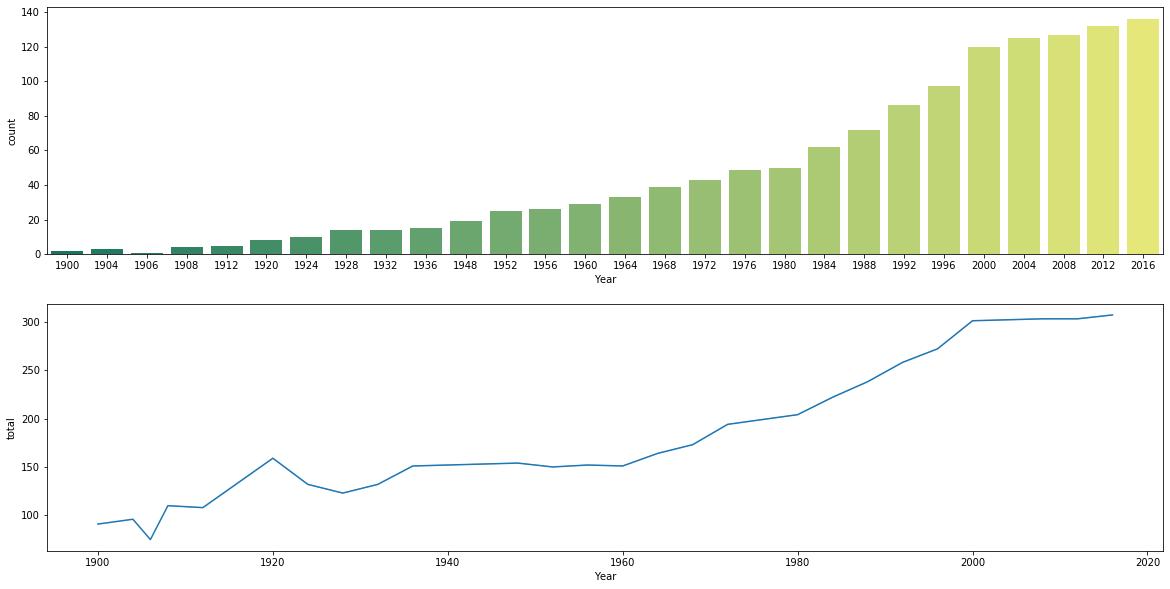

In [32]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20,10), sharex=True, sharey=True)
plt.subplot(211)

ax1 = sns.countplot(data=sumTotals, x='Year', palette='summer')

plt.subplot(212)
ax2 = sns.lineplot(x='Year', y='total', data=sumTotals, sort=False)

plt.show()

# How is male and female athlete participation comparable at both the Summer and Winter Olympics?

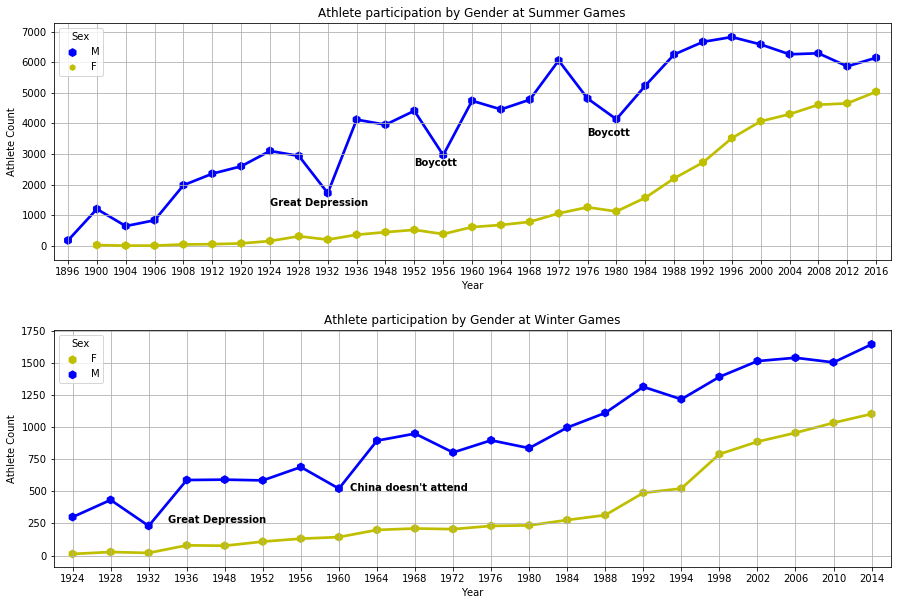

In [85]:
fig, ax1 = plt.subplots(figsize=(15,10))

plt.subplot(211)
ax1 = sns.pointplot(x = summer2['Year'], y=summer2['ID'], markers='h', hue = summer2['Sex'], palette = ['b', 'y'])
ax1.text(7, 1300, "Great Depression", horizontalalignment='left', size='medium', color='black', weight='semibold')
ax1.text(12, 2600, "Boycott", horizontalalignment='left', size='medium', color='black', weight='semibold')
ax1.text(18, 3600, "Boycott", horizontalalignment='left', size='medium', color='black', weight='semibold')


plt.grid(True)
plt.ylabel('Athlete Count')
plt.title("Athlete participation by Gender at Summer Games")

plt.subplot(212)
ax2 = sns.pointplot(x=winter2['Year'], y=winter2['ID'], markers='h', hue= winter2['Sex'], palette = ['y', 'b'])
ax2.text(2.5, 250, "Great Depression", horizontalalignment='left', size='medium', color='black', weight='semibold')
ax2.text(7.3, 500, "China doesn't attend", horizontalalignment='left', size='medium', color='black', weight='semibold')


plt.grid(True)
plt.ylabel('Athlete Count')
plt.title("Athlete participation by Gender at Winter Games")

plt.subplots_adjust(hspace = .3)
plt.show()

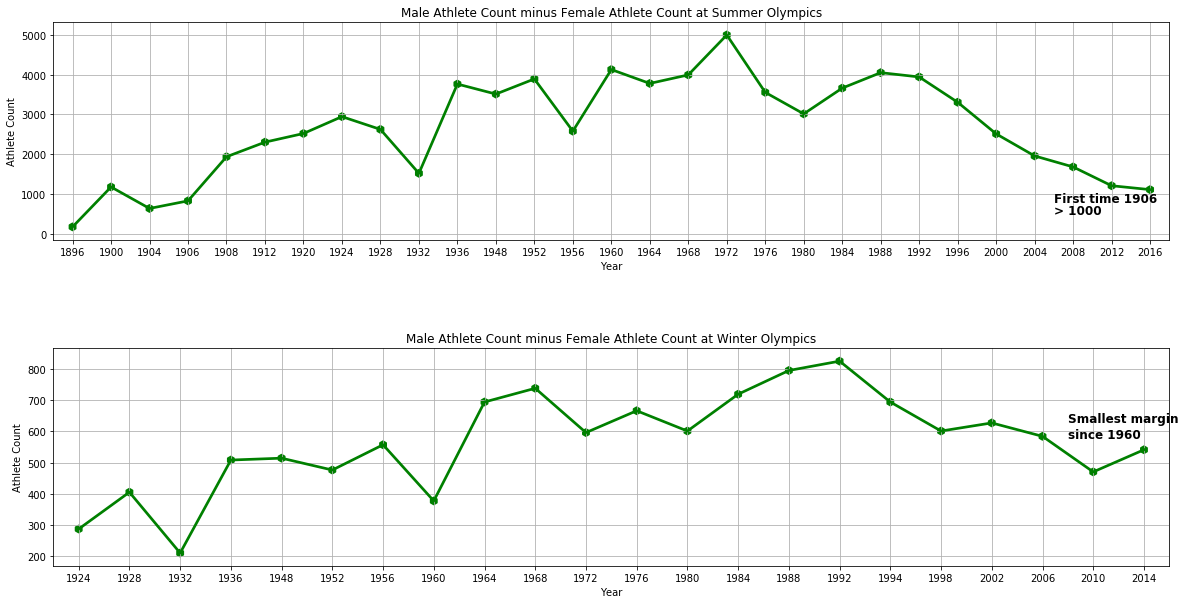

In [152]:
fig = plt.figure(figsize=(20,10))
plt.subplot(211)

ax = sns.pointplot(x = summer3d['Year'], y=summer3d['ID'], markers='h', color ='g')
ax.text(25.5, 800, "First time 1906", horizontalalignment='left', size='large', color='black', weight='semibold')
ax.text(25.5, 500, "> 1000", horizontalalignment='left', size='large', color='black', weight='semibold')

plt.grid(True)
plt.ylabel('Athlete Count')
plt.title("Male Athlete Count minus Female Athlete Count at Summer Olympics")

plt.subplot(212)

ax = sns.pointplot(x = winter3c['Year'], y=winter3c['ID'], markers='h', color ='g')
ax.text(19.5, 630, "Smallest margin", horizontalalignment='left', size='large', color='black', weight='semibold')
ax.text(19.5, 580, "since 1960", horizontalalignment='left', size='large', color='black', weight='semibold')

plt.grid(True)
plt.ylabel('Athlete Count')
plt.title("Male Athlete Count minus Female Athlete Count at Winter Olympics")

plt.subplots_adjust(hspace = .5)
plt.show()

# How are the number of male and female events comparable at the Summer and Winter Olympics?

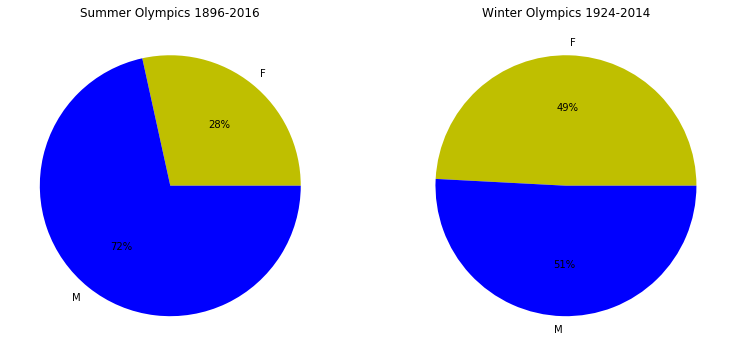

In [35]:
plt.figure(figsize=(13,6))


plt.subplot(121)
EveSum.groupby("Gender")["Event"].nunique().plot.pie(autopct = "%1.0f%%", colors = ["y","b"]) 
plt.ylabel("")
plt.title("Summer Olympics 1896-2016")


plt.subplot(122)
EveWin.groupby("Gender")["Event"].nunique().plot.pie(autopct = "%1.0f%%", colors = ["y","b"]) 
plt.ylabel("")
plt.title("Winter Olympics 1924-2014")

plt.show()

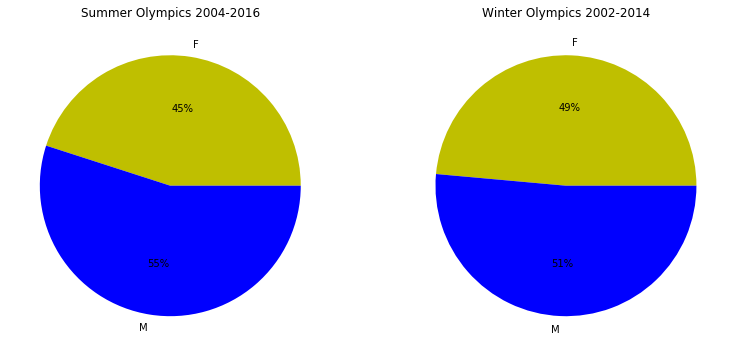

In [160]:
plt.figure(figsize=(13,6))


plt.subplot(121)
rSum.groupby("Gender")["Event"].nunique().plot.pie(autopct = "%1.0f%%", colors = ["y","b"]) 
plt.ylabel("")
plt.title("Summer Olympics 2004-2016")


plt.subplot(122)
rWin.groupby("Gender")["Event"].nunique().plot.pie(autopct = "%1.0f%%", colors = ["y","b"]) 
plt.ylabel("")
plt.title("Winter Olympics 2002-2014")

plt.show()

# How much closer are the four most recent Olympics to a 50/50 split, compared to the first four years there was both a Summer and Winter Olympics?

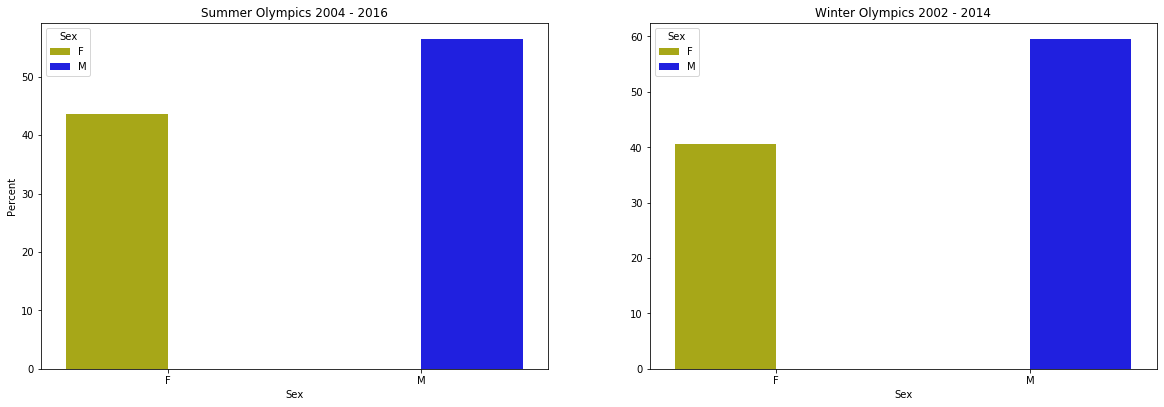

In [36]:
fig = plt.figure(figsize=(20,14))

plt.subplot(221)
ax = sns.barplot(x = last4S['Sex'], y=last4S['Percent'], hue = last4S['Sex'], palette = ['y', 'b'])
plt.title("Summer Olympics 2004 - 2016")
plt.ylabel('Percent')


plt.subplot(222)
ax2 = sns.barplot(x = last4W['Sex'], y=last4W['Percent'], hue = last4W['Sex'], palette = ['y', 'b'])
plt.ylabel("")
plt.title("Winter Olympics 2002 - 2014")


plt.show()

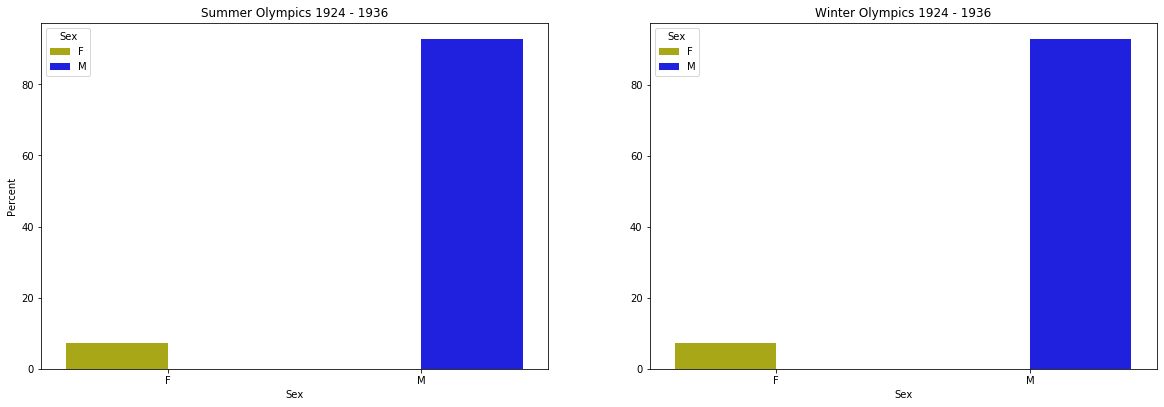

In [130]:
fig = plt.figure(figsize=(20,14))

plt.subplot(221)
ax = sns.barplot(x = first4S['Sex'], y=first4S['Percent'], hue = first4S['Sex'], palette = ['y', 'b'])
    
plt.title("Summer Olympics 1924 - 1936")
plt.ylabel('Percent')


plt.subplot(222)
ax2 = sns.barplot(x = first4W['Sex'], y=first4W['Percent'], hue = first4W['Sex'], palette = ['y', 'b'])
plt.title("Winter Olympics 1924 - 1936")
plt.ylabel("")


plt.show()